In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy.constants as const
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

\begin{equation}
\rm{MTTF(T_{joule}) = A_{MTTF} \cdot exp(\frac{E_A}{k_B T_{joule}})}
\end{equation}

\begin{equation}
\rm{P_{failure, rate}(t, T_{joule})=1-exp(-[\frac{t}{MTTF(T_{joule})}]^{\beta})}
\end{equation}

\begin{equation}
\rm{\tau_{lifetime} = MTTF(T_{joule})[-1 \cdot log_{e}(1 - P_{failure, rate}(T_{joule}))]^{1/\beta}}
\end{equation}

In [2]:
''''
Extracted data from Fig 6 and plotting the results
'''

figure_6 = pd.read_csv('ttf_vs_kT.csv')
figure_6["T"] = 1 / figure_6["kT"] * const.eV / const.k - const.zero_Celsius
Ea_fit = np.polyfit(figure_6["kT"], np.log(figure_6["TTF"]), 1)
kTinv_array = np.linspace(17, 20.5, 100)
mttf_fit = np.polyval(Ea_fit, kTinv_array)
print("Activation energy is ", Ea_fit[0], "eV")
px.line(figure_6, x='kT', y='TTF', title='Fig(6): TTF vs kT', labels={"kT":"1/kT {1/eV}", "TTF":"Time to Fail (Hours)"}, log_x=True, log_y=True, width=800, height=400).show()

Activation energy is  2.107565747858432 eV


Activation energy is  1.966256206948785 eV
Amttf_fit 8.88893341469434e-15


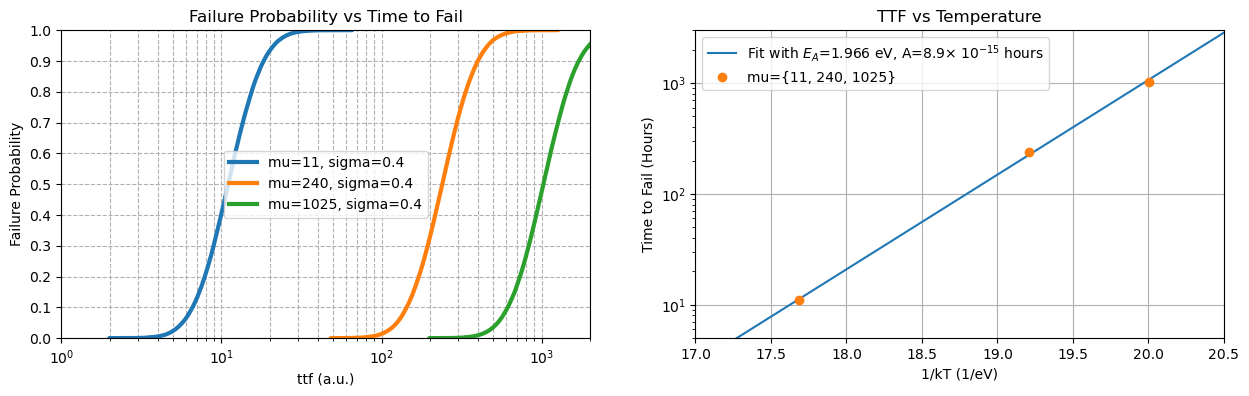

In [3]:
plt.figure(figsize=(15,4))
plt.subplot(121)
for mu_exp in [11, 240, 1025]:
       # plt.subplot(121)
       sigma = 0.4
       size = 100001
       s = stats.lognorm(s=sigma, scale=mu_exp)
       plt.axis('tight')
       s_rvs = s.rvs(size=size)
       plt.ecdf(s_rvs, linewidth=3.0, label=f'mu={mu_exp}, sigma={sigma}')
       plt.xscale('log')
       plt.legend()
       plt.yticks(np.arange(0, 1.1, 0.1))
       plt.grid(True, which="both", ls="--")
       plt.xlim([1, 2e3])
       plt.ylim([0, 1])
       plt.xlabel('ttf (a.u.)')
       plt.ylabel("Failure Probability")
plt.title('Failure Probability vs Time to Fail')
mttf = np.array([11, 240, 1025])
T_joule = np.array([383, 331, 307]) + const.zero_Celsius
kTinv = np.array([(const.eV / T  / const.k) for T in T_joule])
Ea_fit = np.polyfit(kTinv, np.log(mttf), 1)
kTinv_array = np.linspace(17, 20.5, 100)
mttf_fit = np.polyval(Ea_fit, kTinv_array)
print("Activation energy is ", Ea_fit[0], "eV")
print("Amttf_fit", np.exp(Ea_fit[1]))
plt.subplot(122)
plt.plot(kTinv_array, np.exp(mttf_fit), label=r'Fit with $E_{A}$='+f'{Ea_fit[0]:0.3f} eV, A={np.exp(Ea_fit[1])*1e15:0.1f}'+r'$\times$ 10$^{-15}$ hours')
plt.semilogy(kTinv , mttf, 'o', label='mu={11, 240, 1025}')
plt.xlim([17, 20.5])
plt.ylim([5, 3000])
plt.xlabel('1/kT (1/eV)')
plt.ylabel('Time to Fail (Hours)')
plt.title(r'TTF vs Temperature')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
mu_fit = np.exp(Ea_fit[1]) * np.exp(Ea_fit[0] * kTinv)
mu_fit

array([  11.25470335,  224.50453608, 1070.94858103])

In [5]:
np.exp(Ea_fit[1])

8.88893341469434e-15

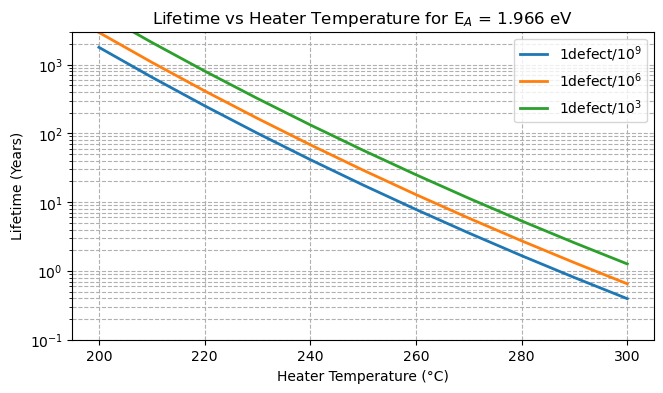

In [8]:
T_range = np.linspace(200, 300, num=11) + const.zero_Celsius
kTinv_range = const.eV / T_range / const.k

fit_factor = 22
# fit_factor = 1

mttf_range = np.exp(Ea_fit[1]) * np.exp(Ea_fit[0] * kTinv_range)*fit_factor
sigma = 0.4

size = 10001

lifetime_years = np.zeros((len(T_range), 3))

for idx in range(len(T_range)):
      s = stats.lognorm(s=sigma, scale=mttf_range[idx])
      lifetime_years[idx, 0] = s.ppf(1e-9)/24/365
      lifetime_years[idx, 1] = s.ppf(1e-6)/24/365
      lifetime_years[idx, 2] = s.ppf(1e-3)/24/365
      
plt.figure(figsize=(7.5, 4))
plt.plot(T_range - const.zero_Celsius, lifetime_years[:, 0], linewidth=2.0, label=r'1defect/10$^{9}$')
plt.plot(T_range - const.zero_Celsius, lifetime_years[:, 1], linewidth=2.0, label=r'1defect/10$^{6}$')
plt.plot(T_range - const.zero_Celsius, lifetime_years[:, 2], linewidth=2.0, label=r'1defect/10$^{3}$')
plt.legend()
plt.ylim(0.1, 3000)
plt.grid(True, which="both", ls="--")
plt.yscale('log')
plt.xlabel('Heater Temperature (°C)')
plt.ylabel('Lifetime (Years)')
plt.title(r'Lifetime vs Heater Temperature for E$_{A}$ = '+f'{Ea_fit[0]:0.3f} eV')
plt.show()

In [12]:
s.cdf(1*24*365)*1e4

1.1922774928222672